[View in Colaboratory](https://colab.research.google.com/github/RomanShekhovtsov/ml-intro/blob/master/7_final.ipynb)

In [1]:
from time import time

def t0():
    global t_0
    t_0 = time()

def ptime():
    print( "TIME: ", round( time() - t_0, 3) )
  

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

def prepare_data( features_url ):
    features = pd.read_csv( features_url, index_col='match_id', compression='zip' )
    #features.head()

    # Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
    
    target = None
    if 'radiant_win' in features:
        target = features.radiant_win
        features = features.drop( features.columns[-6:], 1)
    return features, target

In [4]:
# 1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше
gdrive_file_id = '13oDRm2q6vsh6OtHJB56tdY82-DMSpz7s'
#features_url = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=' + gdrive_file_id
features_url = 'features.zip'
features_test_url = 'features_test.zip' 

features, target = prepare_data( features_url )
features_test, target_test  = prepare_data( features_test_url )
features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [ ]:
features.describe()

In [6]:
# 2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений.
# Много ли пропусков в данных?
def features_with_miss( features ):
    c = features.count()
    print( 'max:', max(c) )
    print( 'misses:', c[c<max(c)].sort_values(), sep='\n')
  
features_with_miss( features )

max: 97230
misses:
Series([], dtype: int64)


##Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

###Признаки, имеющие пропуски
```
first_blood_player2            53243
radiant_flying_courier_time    69751
dire_flying_courier_time       71132
first_blood_time               77677
first_blood_team               77677
first_blood_player1            77677
dire_bottle_time               81087
radiant_bottle_time            81539
radiant_first_ward_time        95394
dire_first_ward_time           95404
radiant_courier_time           96538
dire_courier_time              96554
```
###Обоснование

Очевидно, в первые 5 мин матча не происходили события, описываемые данными признаками.

При этом по событию **first_blood** мы видим аномалию признака **first_blood_player2** - заполнено 53243 строки.
У остальных признаков **first_blood**, например, **first_blood_time**, заполнено 77677 строк.
Возможная причина (https://otvet.mail.ru/question/83833036):

First blood” может быть засчитан если игрок был убит башней или крипами принадлежащими к команде соперника при условии что это произошло в короткий промежуток времени после нанесения урона игроком противоположной команды


In [7]:
# 3. Замените пропуски на нули с помощью функции fillna(). 
features = features.fillna(0)
features_test = features_test.fillna(0)
features_with_miss( features )

# На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание.
# Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины
# можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака.
# Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.

max: 97230
misses:
Series([], dtype: int64)


In [ ]:
# 4. Какой столбец содержит целевую переменную? Запишите его название.
# radiant_win
target.head()

<Figure size 432x288 with 0 Axes>

TIME:  4.936
TIME:  4.861
TIME:  4.607
TIME:  4.753
TIME:  4.909
cross_val_score:  0.6648329228049101 mean_roc_auc:  0.6648329228049101
TIME:  9.133
TIME:  10.493
TIME:  10.416
TIME:  9.891
TIME:  10.009
cross_val_score:  0.6821140369500347 mean_roc_auc:  0.6821140369500347
TIME:  14.631
TIME:  14.285
TIME:  15.993
TIME:  14.377
TIME:  14.805
cross_val_score:  0.6896947542059905 mean_roc_auc:  0.6896947542059905


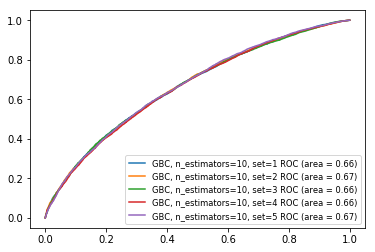

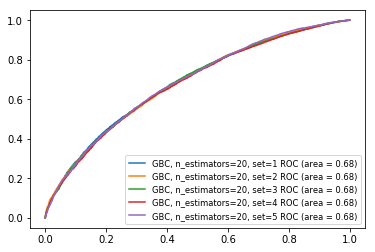

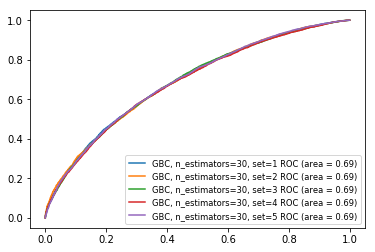

In [19]:
randomState = 1 #заменить на Nonе для проверки с вариациями
nJobs = 1 #сколько ядер используем

# 5. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". 
# Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True),
# поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc

pl.clf()
pl.show()

kf = KFold( n_splits=5, shuffle=True, random_state=randomState )

# Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации,
# попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30).
for n in (10, 20, 30):
    #print( train_index.shape, test_index.shape )
    gbc = GradientBoostingClassifier( n_estimators=n, random_state=randomState )
   
    #print( train_index[:10]) #train_x.count() )

    m = 0   
    sum_roc_auc = 0
    plt.figure()     
    for train_index, test_index in kf.split( features ):
        t0()
        
        m = m + 1
        train_x = features.iloc[ train_index, :]
        train_y =   target.iloc[ train_index]

        test_x = features.iloc [ test_index, :]
        test_y =   target.iloc [ test_index]
        
        gbc.fit( train_x, train_y )
        predict = gbc.predict_proba( test_x )[:, 1] #делаем через predict_proba
        
        fpr, tpr, thresholds = roc_curve(test_y, predict)
        roc_auc  = auc(fpr, tpr) #площадь под кривой
        sum_roc_auc = sum_roc_auc + roc_auc
        pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('GBC, n_estimators=' + str(n) + ', set=' + str(m), roc_auc))
        
        ptime()
    
    pl.legend(loc=0, fontsize='small')
    
    mean_roc_auc = sum_roc_auc / m
    
    # можно было бы тоже самое получить через cross_val_score(), результаты совпадают
    scores = cross_val_score( gbc, features, target, cv=kf, scoring='roc_auc', n_jobs=nJobs )
    
    print( "cross_val_score: ", np.mean( scores ), 'mean_roc_auc: ', mean_roc_auc )


###Долго ли настраивались классификаторы?###
Результат на Intel Core i5 (4 core, n_jobs=4):
```
n_estimators ROC-AUC            время (сек)
10           0.6648329228049101 21.174
20           0.6821140369500347 38.3
30           0.6896947542059905 54.542
```
###Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?###
Качество, скорее всего, продолжит расти при дальнейшем его увеличении.

In [54]:
# Подход 2: логистическая регрессия

def calc_linear_regression( features ):
    # Важно: не забывайте, что линейные алгоритмы чувствительны к масштабу признаков!
    # Может пригодиться sklearn.preprocessing.StandartScaler.
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    #scaled_features = scaler.fit_transform( features )
    #scaled_target = target #scaler.fit_transform( target )

    # Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) 
    # с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. 
    from sklearn.linear_model import LogisticRegression

    plt.figure()
    c_list   = list()
    roc_list = list()

    for c in np.linspace(0.003, 0.007, 20): # (0.0001, 0.001, 0.01, 0.1, 1 ):

        t0()
        lr = LogisticRegression( 'l2', C=c, random_state=randomState )

        m = 0   
        sum_roc_auc = 0
        for train_index, test_index in kf.split( scaled_features ):

            m = m + 1
            train_x = scaler.fit_transform( features.iloc[ train_index, :] )
            train_y = target.iloc[ train_index]

            test_x = scaler.fit_transform( features.iloc [ test_index, :] )
            test_y = target.iloc[ test_index]

            lr.fit( train_x, train_y )
            predict = lr.predict_proba( test_x )[:, 1] #делаем через predict_proba

            fpr, tpr, thresholds = roc_curve(test_y, predict)
            roc_auc  = auc(fpr, tpr) #площадь под кривой
            sum_roc_auc = sum_roc_auc + roc_auc
            #pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LR, C=' + str(c) + ', set=' + str(m), roc_auc))


        #pl.legend(loc=0, fontsize='small')

        mean_roc_auc = sum_roc_auc / m
        roc_list.append( mean_roc_auc )
        c_list.append( c )
        # можно было бы тоже самое получить через cross_val_score(), результаты совпадают
        #scores = cross_val_score( gbc, features, target, cv=kf, scoring='roc_auc', n_jobs=nJobs )

        print( 'LR, C=' + str(c), 'mean_roc_auc: ', mean_roc_auc )
        ptime()

    pl.plot( c_list, roc_list )

LR, C=0.003 mean_roc_auc:  0.7163831308913554
TIME:  12.303
LR, C=0.0032105263157894736 mean_roc_auc:  0.7163852058630286
TIME:  11.228
LR, C=0.0034210526315789475 mean_roc_auc:  0.7163865345018007
TIME:  11.315
LR, C=0.003631578947368421 mean_roc_auc:  0.7163884950930189
TIME:  11.491
LR, C=0.003842105263157895 mean_roc_auc:  0.7163878924920816
TIME:  11.419
LR, C=0.0040526315789473685 mean_roc_auc:  0.7163877285290703
TIME:  11.397
LR, C=0.004263157894736842 mean_roc_auc:  0.7163885448500986
TIME:  11.825
LR, C=0.0044736842105263155 mean_roc_auc:  0.7163897278570343
TIME:  11.885
LR, C=0.00468421052631579 mean_roc_auc:  0.7163896374032701
TIME:  11.68
LR, C=0.004894736842105263 mean_roc_auc:  0.7163888839856879
TIME:  11.778
LR, C=0.005105263157894737 mean_roc_auc:  0.7163892829270188
TIME:  12.401
LR, C=0.005315789473684211 mean_roc_auc:  0.7163876397619484
TIME:  12.283
LR, C=0.005526315789473685 mean_roc_auc:  0.7163874346250028
TIME:  12.338
LR, C=0.005736842105263158 mean_roc_au

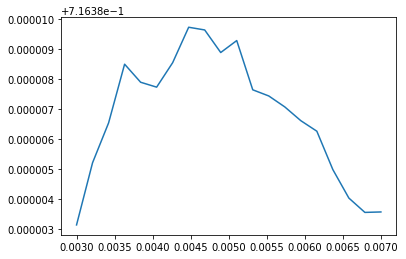

In [48]:
calc_linear_regression( features )

# Подберите при этом лучший параметр регуляризации (C). 
# C=0.0044736842105263155 mean_roc_auc:  0.7163897278570343

# Какое наилучшее качество у вас получилось?
# 0.7163897278570343

# Как оно соотносится с качеством градиентного бустинга? 
# лучше, чем у градиентного бустинга

# Чем вы можете объяснить эту разницу?
# градиентный бустинг нашел локальный оптимум.

# Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
#да

LR, C=0.003 mean_roc_auc:  0.7164121549433904
TIME:  10.15
LR, C=0.0032105263157894736 mean_roc_auc:  0.7164155462224151
TIME:  11.083
LR, C=0.0034210526315789475 mean_roc_auc:  0.7164154139814071
TIME:  11.085
LR, C=0.003631578947368421 mean_roc_auc:  0.7164177501289806
TIME:  10.287
LR, C=0.003842105263157895 mean_roc_auc:  0.7164180369587958
TIME:  10.96
LR, C=0.0040526315789473685 mean_roc_auc:  0.7164176988948179
TIME:  10.927
LR, C=0.004263157894736842 mean_roc_auc:  0.7164191550069081
TIME:  10.74
LR, C=0.0044736842105263155 mean_roc_auc:  0.7164181894780824
TIME:  10.786
LR, C=0.00468421052631579 mean_roc_auc:  0.7164178470007962
TIME:  10.827
LR, C=0.004894736842105263 mean_roc_auc:  0.71641769949563
TIME:  10.889
LR, C=0.005105263157894737 mean_roc_auc:  0.7164180324048501
TIME:  10.941
LR, C=0.005315789473684211 mean_roc_auc:  0.7164179826354994
TIME:  10.888
LR, C=0.005526315789473685 mean_roc_auc:  0.7164174221567103
TIME:  10.944
LR, C=0.005736842105263158 mean_roc_auc:  

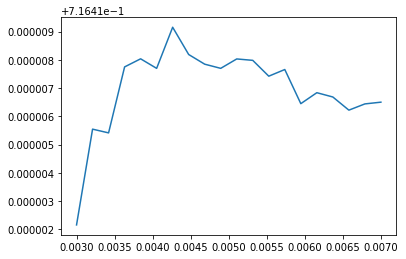

In [55]:
# Среди признаков в выборке есть категориальные, которые мы использовали 
# как числовые, что вряд ли является хорошей идеей.
# Категориальных признаков в этой задаче одиннадцать:
# lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. 
# Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии
# на новой выборке с подбором лучшего параметра регуляризации. 
cat_fields = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero','r4_hero','r5_hero', 
              'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero' ]
non_cat_features = features.drop( cat_fieds, 1)
non_cat_features[:10]
calc_linear_regression( non_cat_features )

# Изменилось ли качество? Чем вы можете это объяснить?
# C=0.004263157894736842 mean_roc_auc:  0.7164191550069081
# качество незначительно выросло, за счет удаления категорийных признаков
# модель не могла их использовать, они лишь вносили шум в результат.

In [79]:
# Выясните из данных, сколько различных идентификаторов героев существует 
# в данной игре (вам может пригодиться фукнция unique или value_counts).
cat_fields = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero','r4_hero','r5_hero', 
              'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero' ]

hero_id_fields = cat_fields.copy()
hero_id_fields.remove('lobby_type')

uniq_ids = list()
for field in hero_id_fields:
      uniq_ids.extend( features[field].unique() )
uniq_ids = set( uniq_ids )

heroes_count = len(uniq_ids)
x_pick = np.zeros( features.shape[0], heroes_count )

for i, match_id in enumerate( features.index ):
    for p in xrange(5):
        x_pick[i, features.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        x_pick[i, features.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

# Воспользуемся подходом "мешок слов" для кодирования информации о героях. 
# Пусть всего в игре имеет N различных героев.
# Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой
# не участвовал в матче; единице, если i-й герой играл за команду Radiant;
# минус единице, если i-й герой играл за команду Dire.

# Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

# Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации.

# Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?

# Постройте предсказания вероятностей победы команды Radiant
# для тестовой выборки с помощью лучшей из изученных моделей
# (лучшей с точки зрения AUC-ROC на кросс-валидации).

# Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке
# [0, 1], не совпадают между собой (т.е. что модель не получилась константной).